## Exercise1 on Sep 21st, 2022

In [ ]:
%%bash
pip install -r requirements.txt > /dev/null 2>&1

### Load MNIST dataset

#### import the dataset and libraries

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/home/jiawei/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


(60000, 28, 28)
(10000, 28, 28)


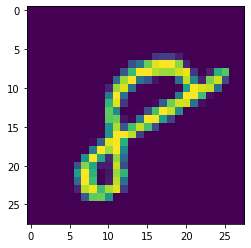

In [16]:
# Loads the data
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()
# print the original shape of $train_data
print(train_data.shape)
print(test_data.shape)
# Plots a single digit from the data
plt.imshow(train_data[train_data.shape[0]-1])
plt.show()
# Reshapes the data to work in an FEN
train_data = train_data.reshape((60000, 28*28))
test_data = test_data.reshape((10000, 28*28))
num_classes = len(np.unique(train_labels))
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [10]:
train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)